In [1]:
import pandas as pd 
import geopandas as gpd 
import rasterio 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import pickle 
import seaborn as sns 

In [2]:
# This function written by David Shean, UW
def sample_raster(df, src, diff_col=None):
    #df_proj = df.to_crs(src.crs)
    coord = [(pt.x, pt.y) for pt in df.to_crs(src.crs).geometry]
    s = np.fromiter(src.sample(coord), dtype=src.dtypes[0])
    #s[s == src.nodata] = np.nan
    sm = np.ma.masked_equal(s, src.nodata)
    sample_colname = os.path.splitext(os.path.split(src.name)[-1])[0]
    df[sample_colname] = sm
    if diff_col is not None:
        out_colname = '{} {} diff'.format(diff_col, sample_colname)
        df[out_colname] = df[diff_col] - df[sample_colname]
    else:
        out_colname = sample_colname
    return out_colname

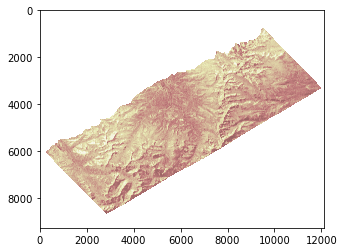

In [16]:
#read in a coherence image 
coherence_input = '/home/jovyan/isce_sat2/contributors/ben_rp/data/rasters/fraser_23306_21020-026_21021-004_0006d_s01_L090HH_01.cor.grd.tiff'
with rasterio.open(coherence_input) as src:
    array = src.read(1)
    plt.imshow(array, cmap='pink')
    src.crs

In [17]:
#read in the pickled gdf of IceSat-2 data for Grand Mesa 
input_file = '/home/jovyan/isce_sat2/contributors/ben_rp/data/pickles/GrandMesaCO_atl06sr.pkl'
if input_file.endswith('.pkl'): 
    gdf = pickle.load(open(input_file,'rb'))
    
elif (input_file.endswith('.shp')) | (input_file.endswith('.geojson')): 
    gdf = gpd.read_file(input_file)
gdf

,delta_time,cycle,gt,n_fit_photons,rms_misfit,distance,segment_id,dh_fit_dx,rgt,dh_fit_dy,pflags,w_surface_window_final,h_sigma,h_mean,spot,geometry,confidence
time,,,,,,,,,,,,,,,,,
2018-10-17 22:31:17.926711060,2.505068e+07,1,50,18,0.612480,4.333154e+06,216070,0.061618,295,0.0,0,3.004887,0.212123,1630.414401,2,POINT (-108.29425 38.94794),2
2018-10-17 22:31:17.933762844,2.505068e+07,1,50,27,0.618246,4.333204e+06,216072,0.138470,295,0.0,0,4.204065,0.121363,1634.427122,2,POINT (-108.29431 38.94839),2
2018-10-17 22:31:17.940811048,2.505068e+07,1,50,11,0.542209,4.333255e+06,216075,0.123612,295,0.0,0,5.222111,0.684069,1640.986957,2,POINT (-108.29436 38.94884),2
2018-10-17 22:31:17.961912776,2.505068e+07,1,50,39,0.132131,4.333405e+06,216082,0.026322,295,0.0,0,3.000000,0.061287,1707.146829,2,POINT (-108.29454 38.95019),2
2018-10-17 22:31:17.968966112,2.505068e+07,1,50,73,0.145303,4.333455e+06,216085,0.020285,295,0.0,0,3.000000,0.017027,1708.316621,2,POINT (-108.29459 38.95064),2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07 23:39:21.695018384,1.319316e+08,14,60,65,0.151049,1.573879e+07,785787,-0.041143,1156,0.0,0,3.000000,0.021026,3054.287921,6,POINT (-108.12232 38.93893),4
2022-03-07 23:39:21.702053728,1.319316e+08,14,60,26,0.113582,1.573884e+07,785790,-0.024935,1156,0.0,0,3.000000,0.144042,3052.801205,6,POINT (-108.12238 38.93848),4
2022-03-07 23:39:21.709094368,1.319316e+08,14,60,45,0.136026,1.573889e+07,785792,-0.008373,1156,0.0,0,3.000000,0.067745,3056.711825,6,POINT (-108.12243 38.93803),4


<AxesSubplot:xlabel='confidence', ylabel='fraser_23306_21020-026_21021-004_0006d_s01_L090HH_01.cor.grd'>

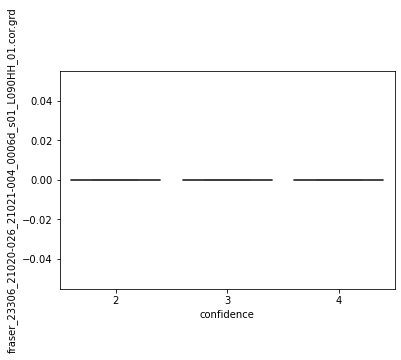

In [15]:
#get some zonal stats 
#we want this to be a geodataframe with a new col added that has the coherence value at that point
col_name = sample_raster(gdf,src)
col_name
gdf
#need to change for the column headers 
sns.boxplot(x='confidence',y=col_name,data = gdf)
